# Project:     The Movie Database (TMDb)
-------
![](https://images.pexels.com/photos/1117132/pexels-photo-1117132.jpeg?crop=entropy&cs=srgb&dl=pexels-martin-lopez-1117132.jpg&fit=crop&fm=jpg&h=426&w=640)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
<a id='intro'></a>

#### import all packages

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [128]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [129]:
datebase_shape = np.asarray(df.shape)
print('Number of :- rows = {} , columns = {}'.format(datebase_shape[0],datebase_shape[1]))

Number of :- rows = 10866 , columns = 21


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [131]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [132]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [133]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [134]:
df.drop(columns=['id','imdb_id','homepage','overview','tagline','cast','keywords'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [135]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

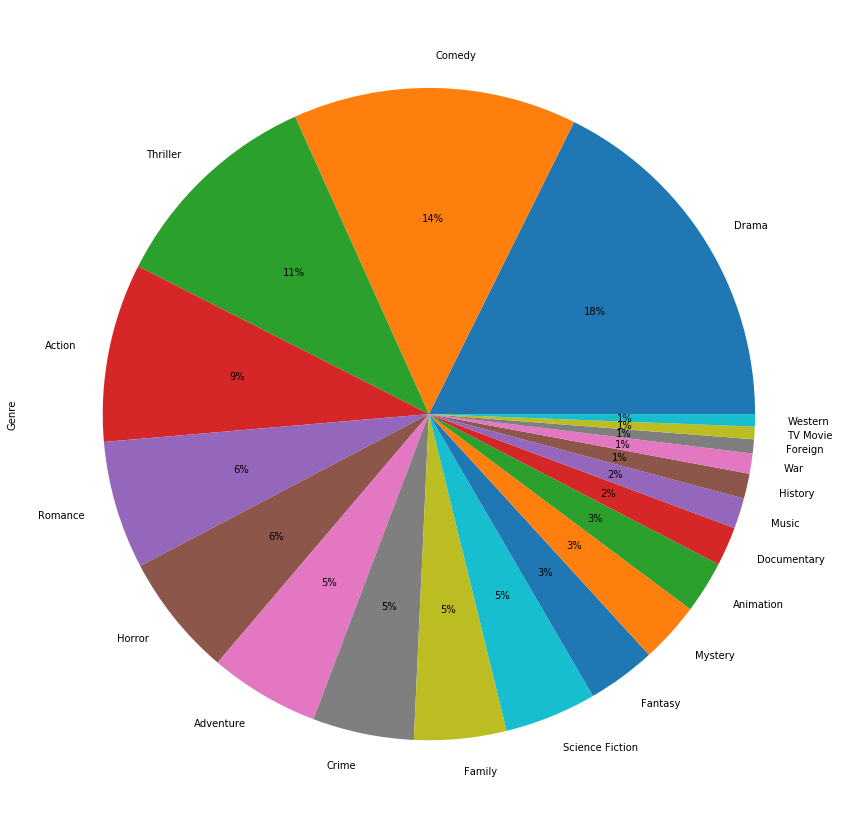

In [136]:
split = df.genres.str.split('|', expand=True).stack().value_counts()
split.plot(kind='pie',figsize=(15,15),label='Genre',autopct='%1.0f%%');

### What is the maximum movie revenue at all times?

In [137]:
df.loc[df['revenue'] == df['revenue'].max()]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


# What kinds of properties are associated with movies that have high revenues?

>1. budget_adj is the best  189164428
>2. Best Director is Peter Jackson , Joss Whedon , James Cameron , Christopher Nolan , ...           
>3. Best runtime is 130 to 143 
>4. Best genres Action|Adventure|Fantasy|Science Fiction

In [197]:
best_revenues = df[df['revenue'] > 1000000000]
best_revenues

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1921,5.572950,200000000,1025467110,Alice in Wonderland,Tim Burton,108,Family|Fantasy|Adventure,Walt Disney Pictures|Team Todd|Tim Burton Prod...,3/3/10,2853,6.3,2010,2.000000e+08,1.025467e+09
1930,2.711136,200000000,1063171911,Toy Story 3,Lee Unkrich,103,Animation|Family|Comedy,Walt Disney Pictures|Pixar Animation Studios,6/16/10,2924,7.5,2010,2.000000e+08,1.063172e+09
2875,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09


### Best budget_adj with high revenues

In [205]:
best_revenues.budget_adj.value_counts() 

2.000000e+08    2
2.374361e+08    2
6.807997e+07    1
1.873655e+08    1
3.683713e+08    1
1.839999e+08    1
1.379999e+08    1
1.890326e+08    1
1.114231e+08    1
1.899489e+08    1
1.211748e+08    1
2.089437e+08    1
2.716921e+08    1
3.148127e+07    1
2.408869e+08    1
2.163338e+08    1
1.872067e+08    1
1.404050e+08    1
1.747999e+08    1
2.575999e+08    1
Name: budget_adj, dtype: int64

In [204]:
best_revenues.budget_adj.mean() 

189164428.45123404

### Best Director with high revenues

In [199]:
best_revenues.director.value_counts() 

Peter Jackson               2
Joss Whedon                 2
James Cameron               2
Christopher Nolan           2
J.J. Abrams                 1
Michael Bay                 1
Tim Burton                  1
Gore Verbinski              1
Lee Unkrich                 1
Rob Marshall                1
Sam Mendes                  1
Irwin Winkler               1
Kyle Balda|Pierre Coffin    1
Colin Trevorrow             1
James Wan                   1
David Yates                 1
Shane Black                 1
Chris Buck|Jennifer Lee     1
Name: director, dtype: int64

### Best runtime with high revenues

In [202]:
best_revenues.runtime.value_counts() 

130    2
143    2
136    2
124    1
201    1
162    1
165    1
169    1
103    1
137    1
108    1
91     1
141    1
114    1
194    1
151    1
152    1
154    1
102    1
Name: runtime, dtype: int64

### What Is the Most Profitable Movie Ever?

In [30]:
profit = ( df['revenue'] + df['revenue_adj']) - ( df['budget'] + df['budget_adj'] )

In [31]:
df.loc[profit.idxmax()]         

id                                                                  19995
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
keywords                culture clash|future|space war|space colony|so...
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                                     12/10/09
vote_count                                                           8458
vote_average                          

## Is the number of movies increasing every year?

In [54]:
number_of_movies = df["release_year"].value_counts().sort_index()

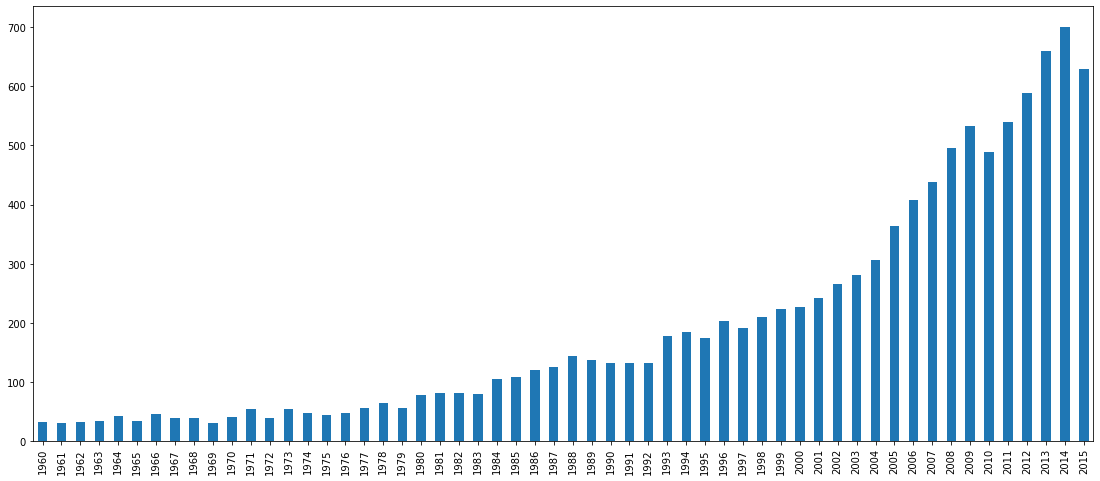

In [55]:
number_of_movies.plot(kind='bar',figsize=(19,8));

<a id='conclusions'></a>
## Conclusions
### We have answered some questions about
    1. the genres are most popular from year to year ( Drama , Comedy , Thriller , ...) 
    2. properties are associated with movies that have high revenues
    3. number of movies increasing every year
    